## Overview

This notebook will show you how to create and query a table or DataFrame that you uploaded to DBFS. [DBFS](https://docs.databricks.com/user-guide/dbfs-databricks-file-system.html) is a Databricks File System that allows you to store data for querying inside of Databricks. This notebook assumes that you have a file already inside of DBFS that you would like to read from.

This notebook is written in **Python** so the default cell type is Python. However, you can use different languages by using the `%LANGUAGE` syntax. Python, Scala, SQL, and R are all supported.

In [0]:
# File location and type
file_location = "/FileStore/tables/NIFTY_50_01_04_2022_to_31_03_2023.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "false"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

df.head(6)

Out[3]: [Row(_c0='Date ', _c1='Open ', _c2='High ', _c3='Low ', _c4='Close ', _c5='Shares Traded ', _c6='Turnover (₹ Cr)'),
 Row(_c0='01-APR-2022', _c1='17436.9', _c2='17703.7', _c3='17422.7', _c4='17670.45', _c5='291773447', _c6='21132.13'),
 Row(_c0='04-APR-2022', _c1='17809.1', _c2='18114.65', _c3='17791.4', _c4='18053.4', _c5='345526502', _c6='38623.94'),
 Row(_c0='05-APR-2022', _c1='18080.6', _c2='18095.45', _c3='17921.55', _c4='17957.4', _c5='283453612', _c6='25096.7'),
 Row(_c0='06-APR-2022', _c1='17842.75', _c2='17901', _c3='17779.85', _c4='17807.65', _c5='328824420', _c6='24252.48'),
 Row(_c0='07-APR-2022', _c1='17723.3', _c2='17787.5', _c3='17623.7', _c4='17639.55', _c5='308840215', _c6='26236.91')]

In [0]:
pip install yfinance

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
pip install keras 

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
pip install tensorflow

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
pip install ta

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
#importing python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ta
import yfinance as yf
data = yf.download(tickers='^NSEI', start='2022-04-01', end='2023-03-31')


[*********************100%***********************]  1 of 1 completed


In [0]:
# Adding indicators

# Assuming you have already downloaded the data using yfinance
data = yf.download(tickers='^NSEI', start='2022-04-01', end='2023-03-31')

# Calculate RSI
window_length 15
delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

avg_gain = gain.rolling(window=window_length).mean()
avg_loss = loss.rolling(window=window_length).mean()

rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# Calculate Exponential Moving Averages (EMAs)
data['EMAF'] = data['Close'].ewm(span=20, adjust=False).mean()
data['EMAM'] = data['Close'].ewm(span=50, adjust=False).mean()
data['EMAS'] = data['Close'].ewm(span=70, adjust=False).mean()

# Calculate 'Target' column and shift it one day back
data['Target'] = data['Adj Close'] - data['Open']
data['Target'] = data['Target'].shift(-1)

# Create 'TargetClass' as binary classification based on 'Target'
data['TargetClass'] = [1 if data.Target[i] > 0 else 0 for i in range(len(data))]

# Create 'TargetNextClose' column representing next day's closing price
data['TargetNextClose'] = data['Adj Close'].shift(-1)

# Drop rows with missing data, unnecessary columns, and reset index
data.dropna(inplace=True)
data.reset_index(inplace=True)
data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)


[*********************100%***********************]  1 of 1 completed


In [0]:
data_set = data.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

data_set.head(15)

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,17009.050781,17054.300781,16888.699219,16953.949219,36.429402,17435.038394,17617.551884,17635.006415,79.500000,1,17200.800781
1,17121.300781,17223.849609,17064.449219,17200.800781,41.865447,17412.730050,17609.299387,17629.255347,-34.949219,0,17038.400391
2,17073.349609,17110.699219,16958.449219,17038.400391,30.965413,17377.079606,17597.994456,17621.429453,55.550781,1,17245.050781
3,17189.500000,17322.500000,17071.050781,17245.050781,37.173421,17364.505432,17591.005472,17616.444305,-226.699219,0,17102.550781
4,17329.250000,17377.650391,17053.250000,17102.550781,37.270730,17339.557370,17581.333102,17609.637769,144.650391,1,17069.099609
5,16924.449219,17092.250000,16917.250000,17069.099609,39.175299,17313.799488,17571.189865,17602.478323,-419.000000,0,16677.599609
6,17096.599609,17132.849609,16623.949219,16677.599609,30.796608,17253.209023,17553.495008,17590.228274,-172.099609,0,16682.650391
7,16854.750000,16945.699219,16651.849609,16682.650391,32.135566,17198.870106,17536.250560,17578.207375,-4.300781,0,16411.250000
8,16415.550781,16484.199219,16340.900391,16411.250000,30.732960,17123.858667,17513.973322,17562.750985,74.149414,1,16301.849609
9,16227.700195,16403.699219,16142.099609,16301.849609,30.164274,17045.572090,17489.970872,17546.050305,-8.850586,0,16240.049805


In [0]:
print(data_set.shape)

(233, 11)


In [0]:
print(type(data_set))

<class 'pandas.core.frame.DataFrame'>


In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.4824274  0.47696242 0.47437949 ... 0.67348933 1.         0.54200079]
 [0.51361403 0.52533446 0.52326957 ... 0.5336358  0.         0.49585121]
 [0.50029167 0.49305281 0.49378252 ... 0.6442241  1.         0.55457539]
 ...
 [0.50108338 0.49269619 0.48234944 ... 0.57805155 1.         0.48087503]
 [0.47555106 0.48743265 0.48268359 ... 0.47852304 0.         0.47121319]
 [0.48873397 0.47908767 0.48134811 ... 0.70269251 1.         0.50787133]]


In [0]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

233
[[[0.4824274  0.47696242 0.47437949 ... 0.60046014 0.78213609 0.86198181]
  [0.51361403 0.52533446 0.52326957 ... 0.59207816 0.77612512 0.85620351]
  [0.50029167 0.49305281 0.49378252 ... 0.57868312 0.76789081 0.84834057]
  ...
  [0.33589876 0.36058901 0.35040915 ... 0.22327983 0.41079497 0.48807886]
  [0.41369169 0.40265606 0.38513977 ... 0.2287589  0.40324526 0.4790487 ]
  [0.34952608 0.35047484 0.35082642 ... 0.23318833 0.3956323  0.46994186]]

 [[0.51361403 0.52533446 0.52326957 ... 0.59207816 0.77612512 0.85620351]
  [0.50029167 0.49305281 0.49378252 ... 0.57868312 0.76789081 0.84834057]
  [0.53256195 0.55347928 0.52510599 ... 0.57395859 0.76280016 0.84333182]
  ...
  [0.41369169 0.40265606 0.38513977 ... 0.2287589  0.40324526 0.4790487 ]
  [0.34952608 0.35047484 0.35082642 ... 0.23318833 0.3956323  0.46994186]
  [0.33255066 0.31518362 0.32371748 ... 0.23171376 0.3859604  0.45891687]]

 [[0.50029167 0.49305281 0.49378252 ... 0.57868312 0.76789081 0.84834057]
  [0.53256195 0.55

In [0]:
# split data into train test sets

splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

162
(162, 30, 8)
(41, 30, 8)
(162, 1)
(41, 1)
[[0.30200341]
 [0.33662961]
 [0.25811304]
 [0.13665825]
 [0.12463757]
 [0.11328514]
 [0.01906781]
 [0.        ]
 [0.01609843]
 [0.09812441]
 [0.03404371]
 [0.07477988]
 [0.11530264]
 [0.15304058]
 [0.15819841]
 [0.14367707]
 [0.13832055]
 [0.13030685]
 [0.15397829]
 [0.14701609]
 [0.19786866]
 [0.23853379]
 [0.26345542]
 [0.26214834]
 [0.21733441]
 [0.19129025]
 [0.18333344]
 [0.21474856]
 [0.27990907]
 [0.29754186]
 [0.34877795]
 [0.37276215]
 [0.40521433]
 [0.38007957]
 [0.3382636 ]
 [0.38314884]
 [0.46493311]
 [0.52990907]
 [0.58157169]
 [0.58310577]
 [0.59524024]
 [0.59349247]
 [0.59789713]
 [0.63415732]
 [0.63689969]
 [0.67220801]
 [0.68333344]
 [0.71945155]
 [0.75326797]
 [0.75674908]
 [0.70046866]
 [0.6243817 ]
 [0.64904803]
 [0.65684831]
 [0.63340415]
 [0.64376254]
 [0.57385632]
 [0.70071065]
 [0.63918749]
 [0.63823507]
 [0.6741406 ]
 [0.67124172]
 [0.66237579]
 [0.711921  ]
 [0.72175323]
 [0.75102291]
 [0.78901699]
 [0.77017619]
 [

In [0]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
#np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=30, epochs=60, shuffle=True, validation_split = 0.1)

Epoch 1/60
5/5 [==============================] - 3s 170ms/step - loss: 0.1880 - val_loss: 0.2458
Epoch 2/60
5/5 [==============================] - 0s 68ms/step - loss: 0.0445 - val_loss: 0.0074
Epoch 3/60
5/5 [==============================] - 0s 46ms/step - loss: 0.0301 - val_loss: 0.0142
Epoch 4/60
5/5 [==============================] - 0s 49ms/step - loss: 0.0154 - val_loss: 0.0056
Epoch 5/60
5/5 [==============================] - 0s 49ms/step - loss: 0.0141 - val_loss: 0.0081
Epoch 6/60
5/5 [==============================] - 0s 62ms/step - loss: 0.0114 - val_loss: 0.0044
Epoch 7/60
5/5 [==============================] - 0s 49ms/step - loss: 0.0103 - val_loss: 0.0087
Epoch 8/60
5/5 [==============================] - 0s 51ms/step - loss: 0.0098 - val_loss: 0.0034
Epoch 9/60
5/5 [==============================] - 0s 52ms/step - loss: 0.0087 - val_loss: 0.0026
Epoch 10/60
5/5 [==============================] - 0s 55ms/step - loss: 0.0086 - val_loss: 0.0029
Epoch 11/60
5/5 [===========

In [0]:
data_set = data.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

data_set.head(15)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,17009.050781,17054.300781,16888.699219,16953.949219,36.429402,17435.038394,17617.551884,17635.006415,79.500000,1,17200.800781
1,17121.300781,17223.849609,17064.449219,17200.800781,41.865447,17412.730050,17609.299387,17629.255347,-34.949219,0,17038.400391
2,17073.349609,17110.699219,16958.449219,17038.400391,30.965413,17377.079606,17597.994456,17621.429453,55.550781,1,17245.050781
3,17189.500000,17322.500000,17071.050781,17245.050781,37.173421,17364.505432,17591.005472,17616.444305,-226.699219,0,17102.550781
4,17329.250000,17377.650391,17053.250000,17102.550781,37.270730,17339.557370,17581.333102,17609.637769,144.650391,1,17069.099609
5,16924.449219,17092.250000,16917.250000,17069.099609,39.175299,17313.799488,17571.189865,17602.478323,-419.000000,0,16677.599609
6,17096.599609,17132.849609,16623.949219,16677.599609,30.796608,17253.209023,17553.495008,17590.228274,-172.099609,0,16682.650391
7,16854.750000,16945.699219,16651.849609,16682.650391,32.135566,17198.870106,17536.250560,17578.207375,-4.300781,0,16411.250000
8,16415.550781,16484.199219,16340.900391,16411.250000,30.732960,17123.858667,17513.973322,17562.750985,74.149414,1,16301.849609
9,16227.700195,16403.699219,16142.099609,16301.849609,30.164274,17045.572090,17489.970872,17546.050305,-8.850586,0,16240.049805


In [0]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

2/2 [==============================] - 0s 12ms/step
[0.72971183] [0.67310327]
[0.6970928] [0.66007411]
[0.6724119] [0.65839738]
[0.6624578] [0.72763591]
[0.64926213] [0.70221643]
[0.6670357] [0.68996874]
[0.6742733] [0.7326511]
[0.6785348] [0.73883183]
[0.68768007] [0.72833191]
[0.6944001] [0.70400693]


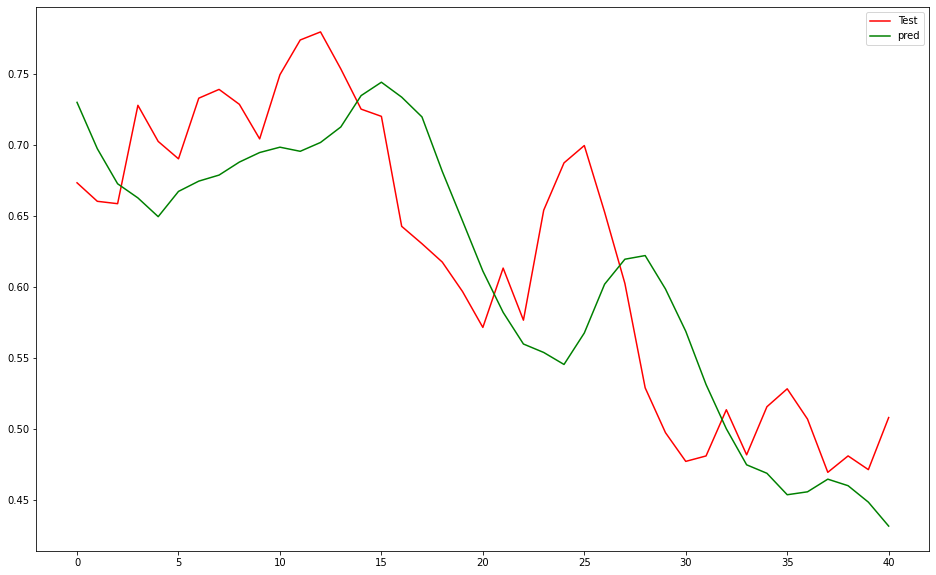

In [0]:
    plt.figure(figsize=(16,10))
plt.plot(y_test, color = 'red', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()